In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

0 --> Non-Diabetic

1 --> Diabetic


In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

NameError: name 'df' is not defined

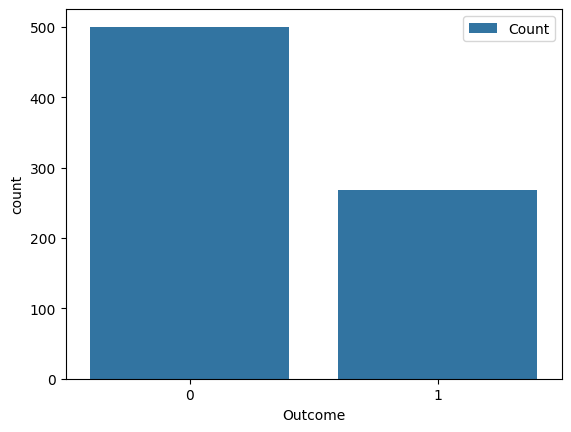

In [ ]:
sns.countplot(data=diabetes_dataset, x = 'Outcome', label='Count')
LD, NLD = df['Outcome'].value_counts()
print('Number of patients without diabetes: {}'.format(LD))
print('Number of patients with diabetes: {}'.format(NLD))

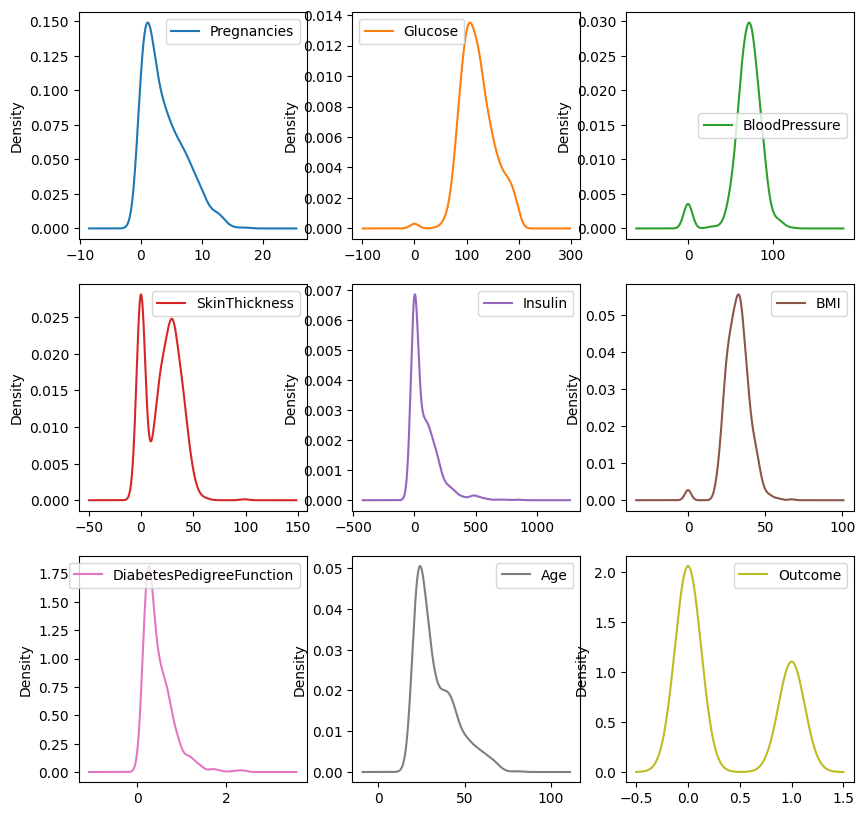

In [ ]:
diabetes_dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(10,10))
plt.show()

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


##logistic Re


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_prediction1 = log.predict(X_train)

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
train1 = accuracy_score(X_train_prediction1, Y_train)
train1

0.7850162866449512

In [ ]:
accuracy_score(Y_test,y_pred1)

0.7597402597402597

##2 . KNeighbors Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
X_train_prediction3 = knn.predict(X_train)

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
train3 = accuracy_score(X_train_prediction3, Y_train)
train3

0.8289902280130294

In [ ]:
accuracy_score(Y_test,y_pred3)

0.7207792207792207

In [ ]:
score = []

for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred))

In [ ]:
score

[0.6558441558441559,
 0.6558441558441559,
 0.6948051948051948,
 0.6818181818181818,
 0.7207792207792207,
 0.6948051948051948,
 0.7012987012987013,
 0.7077922077922078,
 0.7272727272727273]

In [ ]:
import matplotlib.pyplot as plt

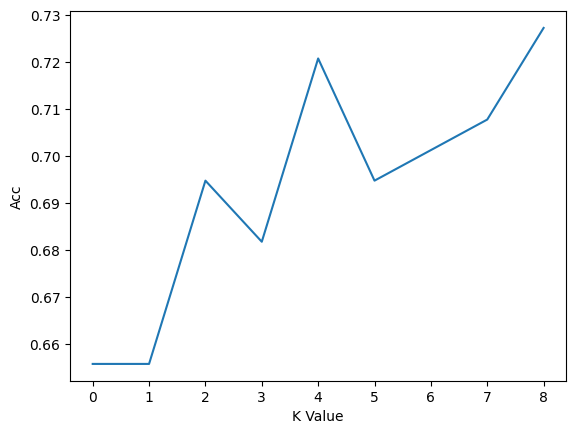

In [ ]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6558441558441559

## Decision tree




In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction4 = dt.predict(X_train)

In [ ]:
y_pred4= dt.predict(X_test)

In [ ]:
train4 = accuracy_score(X_train_prediction4, Y_train)
train4

1.0

In [ ]:
accuracy_score(Y_test,y_pred4)

0.7012987012987013

In [ ]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT'],
                          'ACC':[accuracy_score(Y_test,y_pred1)*100,
                                accuracy_score(Y_test,y_pred3)*100,
                                accuracy_score(Y_test,y_pred4)*100,
                                ]})

In [ ]:
final_data

,Models,ACC
0,LR,75.974026
1,KNN,72.077922
2,DT,70.129870


## where as  SVM ACC = 0.7727

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


<Axes: xlabel='Models', ylabel='ACC'>

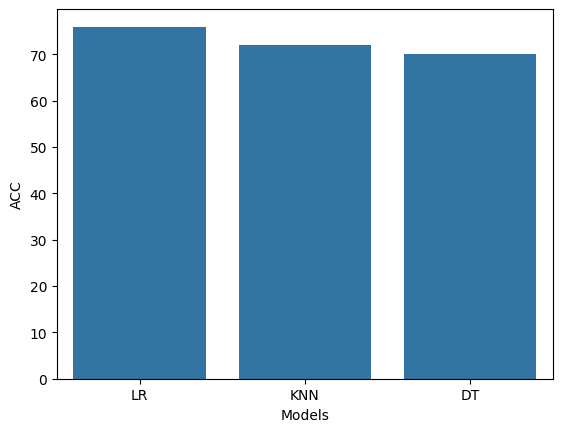

In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [ ]:
final_data_train = pd.DataFrame({'Models':['LR','KNN','DT'],
                          'ACC':[train1*100,

                                train3*100,
                                train4*100,
                                ]})

In [ ]:
final_data_train

,Models,ACC
0,LR,78.501629
1,KNN,82.899023
2,DT,100.000000


In [ ]:
sns.barplot(x='Models', y='ACC', data=final_data_train)
plt.xlabel('Models')
plt.ylabel('Acc')
plt.title("Model Accuracy ")

In [ ]:
sns.barplot(x='Models', y='ACC', data=X_train_prediction, Y_train )

SyntaxError: positional argument follows keyword argument (<ipython-input-77-513741e9b05e>, line 1)